# Introduction: Rosenbrock

Welcome to the first AeroSandbox tutorial!

AeroSandbox is a tool for solving design optimization problems for large, multidisciplinary engineered systems. The most important part of AeroSandbox is its `Opti()` stack, which allows you formulate and solve an optimization problem in natural mathematical syntax.

The `Opti` class extends the `Opti` class of CasADi (the library AeroSandbox uses for automatic differentiation), adding many new features tailored specifically for engineering design. We'll explore more of these advanced features later!

For now, let's solve the "Hello World!" of optimization problems: [the Rosenbrock problem](https://en.wikipedia.org/wiki/Rosenbrock_function). Mathematically, it is stated as:

$$ \underset{x, y}{\text{minimize }}(1-x)^2 + 100(y-x^2)^2 $$

In code:

In [6]:
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

It's a good test case, because the minimum lies at the bottom of a shallow, curving valley:

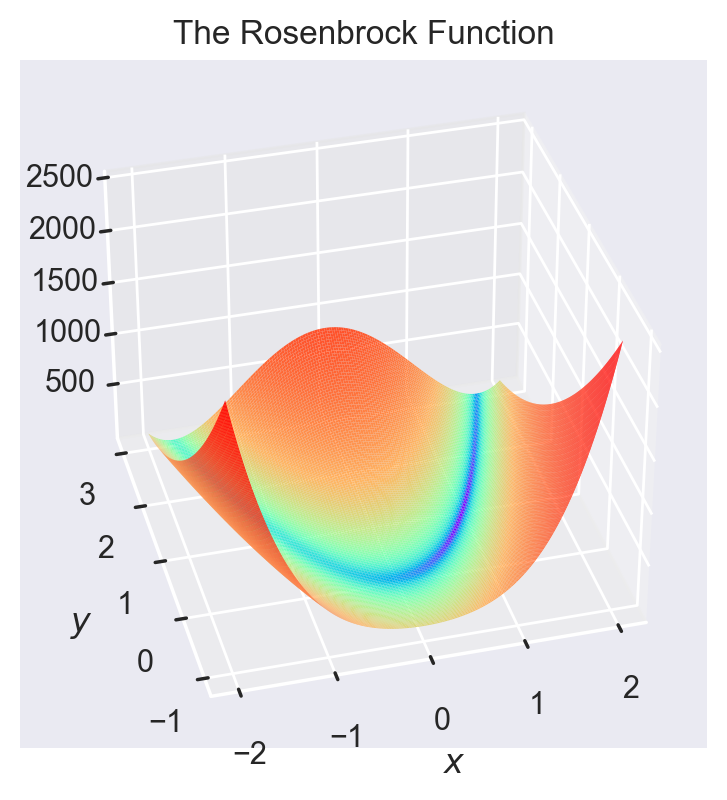

In [7]:
### Don't worry about this code block; this is just here to visualize the Rosenbrock function.
from matplotlib import pyplot as plt, colors; import numpy as np
fig, ax = plt.subplots(figsize=(4, 4), dpi=200, subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.linspace(-2, 2, 150), np.linspace(-1, 3, 150))
ax.plot_surface(X, Y, rosenbrock(X, Y), cmap=plt.cm.rainbow, linewidth=0, norm=colors.LogNorm(vmin=0.1, vmax=2500), rstride=1, cstride=1)
ax.view_init(35, 255); plt.xlabel("$x$"); plt.ylabel("$y$"); plt.title("The Rosenbrock Function"); plt.tight_layout();
plt.show()

As it turns out, a good number of engineering design optimization problems are pretty mathematically similar to the Rosenbrock problem (of course, there are plenty of exceptions). Specifically, many engineering design problems are:

* Continuous: all design variables are continuous inputs (as opposed to being discrete).
* [Nonlinear](https://en.wikipedia.org/wiki/Nonlinear_system): the sensitivity of performance with respect to inputs changes throughout the design space.
* Nonconvex: doesn't satisfy the [convex inequality](https://en.wikipedia.org/wiki/Convex_function#Definition). Speaking loosely, convexity means the objective function is always "curving up" and that the boundary of the feasible design space doesn't have any concave regions.
* Poorly-scaled, i.e. Hessian has a large condition number (e.g. for Rosenbrock, $\text{cond}(H)\approx 2500$ at the optimum)
* [Constrained](https://en.wikipedia.org/wiki/Constrained_optimization): most engineering problems are constrained. The Rosenbrock problem is unconstrained out-of-the-box, but we'll add a constraint in the next tutorial.

For now, let's optimize and find the minimum of the Rosenbrock function! First, we set up the problem:

In [8]:
import aerosandbox as asb  # This is the standard AeroSandbox import convention

opti = asb.Opti()  # Initialize a new optimization environment; convention is to name it `opti`.

### Define your optimization variables
x = opti.variable(init_guess=0)  # You must provide initial guesses.
y = opti.variable(init_guess=0)

### Define your objective
f = (1 - x) ** 2 + 100 * (y - x ** 2) ** 2  # You can construct nonlinear functions of variables...
opti.minimize(f)  # ...and then optimize them.


Then, we solve the problem. The solver will spit out lots of helpful info as it solves; we can ignore this for now (and later we'll learn how to suppress it if desired).

In [9]:
### Optimize
sol = opti.solve()  # This is the conventional syntax to solve the optimization problem.

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

Finally, we can look at the optimal values of our optimization variables:

In [10]:
### Extract values at the optimum
x_opt = sol.value(x)  # Evaluates x at the point where the solver converged.
y_opt = sol.value(y)

### Print values
print(f"x = {x_opt}")
print(f"y = {y_opt}")

x = 0.9999999999999899
y = 0.9999999999999792


The solution is found to be $(1, 1)$, which can be proven to be the optimal value via hand calculations.